In [1]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.4f' % x)

dataset = pd.read_csv('data_harga_apple.csv')
dataset.describe()


,id,jumlah_apple,harga_apple
count,25.0000,25.0000,25.0000
mean,12.0000,48.5200,627310.3200
std,7.3598,34.1042,453356.2224
min,0.0000,0.0000,0.0000
25%,6.0000,23.0000,231449.0000
50%,12.0000,48.0000,668913.0000
75%,18.0000,81.0000,980505.0000
max,24.0000,96.0000,1513440.0000


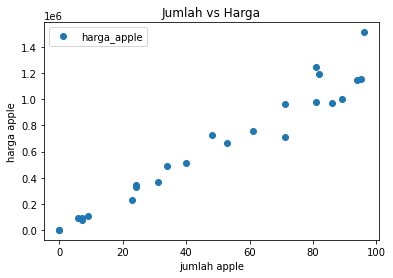

In [2]:
import matplotlib.pyplot as plt

dataset.plot(x='jumlah_apple', y='harga_apple', style='o')
plt.title('Jumlah vs Harga')
plt.xlabel('jumlah apple')
plt.ylabel('harga apple')
plt.show()

In [3]:
x = dataset['jumlah_apple'].values.reshape(-1,1)
y = dataset['harga_apple'].values.reshape(-1,1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)


In [6]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[-10362.99233321]
[[13188.92277723]]


In [7]:
y_pred = regressor.predict(x_test)

In [8]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,-10362.9923
1,963612,926050.5249
2,344592,306171.1543
3,970166,1123884.3665
4,93002,81959.4671


In [9]:
regressor.score(x_test, y_test)

0.9693452852338135

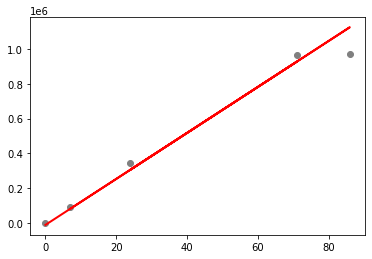

In [10]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [11]:
predict = pd.read_csv('apple_to_predict.csv')
predict

,id,jumlah_apple
0,25,125
1,26,126
2,27,127
3,28,128
4,29,129
5,30,130
6,31,131
7,32,132
8,33,133
9,34,134


In [22]:
x_predict = predict['id'].values.reshape(-1,1)
y_predict = predict['jumlah_apple'].values.reshape(-1,1)
print(y_predict)

[[125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]
 [143]
 [144]
 [145]
 [146]
 [147]
 [148]
 [149]]


In [13]:
y_predict_result = regressor.predict(y_predict)
y_predict_result

array([[1638252.35482096],
       [1651441.2775982 ],
       [1664630.20037543],
       [1677819.12315266],
       [1691008.0459299 ],
       [1704196.96870713],
       [1717385.89148436],
       [1730574.8142616 ],
       [1743763.73703883],
       [1756952.65981606],
       [1770141.5825933 ],
       [1783330.50537053],
       [1796519.42814776],
       [1809708.350925  ],
       [1822897.27370223],
       [1836086.19647946],
       [1849275.1192567 ],
       [1862464.04203393],
       [1875652.96481116],
       [1888841.8875884 ],
       [1902030.81036563],
       [1915219.73314286],
       [1928408.6559201 ],
       [1941597.57869733],
       [1954786.50147456]])

In [16]:
import joblib

joblib.dump(regressor, "apple_price_prediction.pkl")


['apple_price_prediction.pkl']